In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display

plt.style.use(["ggplot", "seaborn-poster"])
%matplotlib inline

# Post Level - Bayesian Analysis

In [2]:
PATH_TO_LOG = '../logs/post_bayesian_logger_oof.csv'
data = pd.read_csv(PATH_TO_LOG)

In [3]:
display(data.head(n = 3))

,id,model,parameters,columns,transformers,column_transforms,valid_strategy,one_fold,observation,post_accuracy,post_precision,post_recall,post_error,user_accuracy,user_precision,user_recall,user_error
0,0,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 7.0, 'random_state': 42}",['social_prepocessed_text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.281,0.476,0.407,0.189,0.346,0.585,0.459,0.163
1,1,<class 'lightgbm.sklearn.LGBMClassifier'>,"{'n_estimators': 500, 'random_state': 42}","['text', 'happy', 'angry', 'surprise', 'sad', ...","[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.280,0.452,0.424,0.171,0.369,0.573,0.509,0.156
2,2,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 1.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.296,0.494,0.425,0.181,0.378,0.598,0.508,0.151


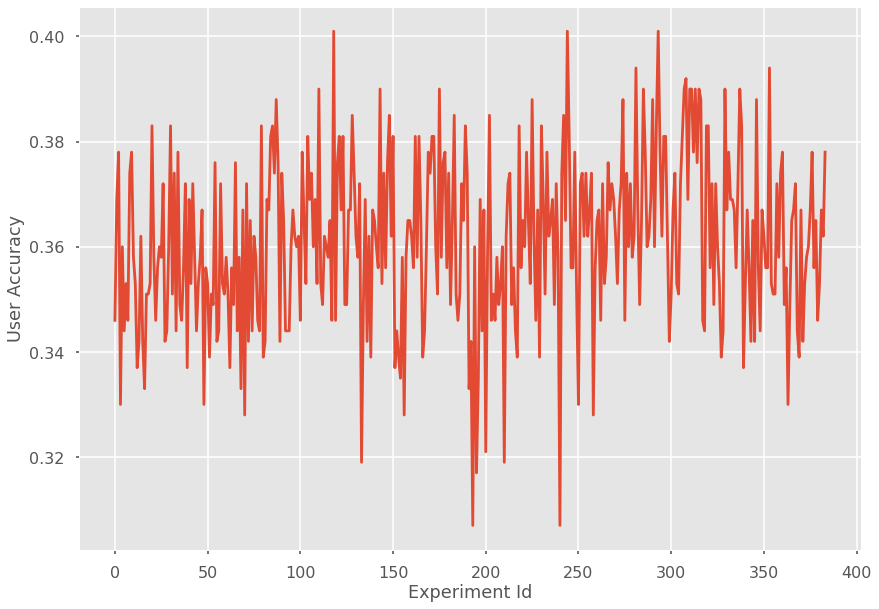

In [4]:
plt.figure(figsize = (14, 10))
plt.plot(data['id'].values, data['user_accuracy'].values)
plt.xlabel("Experiment Id")
plt.ylabel("User Accuracy")
plt.show()

In [5]:
data.groupby("model")["user_accuracy"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
<class 'lightgbm.sklearn.LGBMClassifier'>,104.0,0.354404,0.014613,0.307,0.3455,0.3545,0.3650,0.388
<class 'sklearn.ensemble._forest.RandomForestClassifier'>,82.0,0.373902,0.013557,0.344,0.3620,0.3740,0.3845,0.401
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>,36.0,0.357833,0.018105,0.307,0.3440,0.3610,0.3740,0.388
<class 'sklearn.linear_model._logistic.LogisticRegression'>,83.0,0.359928,0.013841,0.319,0.3510,0.3620,0.3690,0.394
<class 'sklearn.svm._classes.SVC'>,79.0,0.359671,0.014615,0.328,0.3460,0.3580,0.3740,0.388


In [6]:
data.groupby("columns")["user_accuracy"].describe()

,count,mean,std,min,25%,50%,75%,max
columns,,,,,,,,
"['social_prepocessed_text', 'happy', 'angry', 'surprise', 'sad', 'fear']",120.0,0.358042,0.015497,0.307,0.3460,0.3580,0.369,0.394
['social_prepocessed_text'],64.0,0.361266,0.014894,0.330,0.3505,0.3635,0.374,0.390
"['text', 'happy', 'angry', 'surprise', 'sad', 'fear']",63.0,0.362714,0.015504,0.321,0.3530,0.3620,0.374,0.394
['text'],137.0,0.363146,0.017186,0.307,0.3510,0.3620,0.376,0.401


In [7]:
display(data.sort_values(by = "user_accuracy", ascending = False).head(n = 10))

,id,model,parameters,columns,transformers,column_transforms,valid_strategy,one_fold,observation,post_accuracy,post_precision,post_recall,post_error,user_accuracy,user_precision,user_recall,user_error
244,244,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 250, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.304,0.481,0.453,0.163,0.401,0.572,0.574,0.122
293,293,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 250, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.304,0.481,0.453,0.163,0.401,0.572,0.574,0.122
118,118,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 250, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.304,0.481,0.453,0.163,0.401,0.572,0.574,0.122
353,353,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}","['social_prepocessed_text', 'happy', 'angry', ...","[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.305,0.490,0.448,0.168,0.394,0.577,0.555,0.128
281,281,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 0.7, 'random_state': 42}","['text', 'happy', 'angry', 'surprise', 'sad', ...","[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.300,0.515,0.418,0.186,0.394,0.623,0.518,0.156
308,308,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.309,0.488,0.457,0.163,0.392,0.562,0.564,0.124
175,175,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 300, 'random_state': 42}","['text', 'happy', 'angry', 'surprise', 'sad', ...","[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.297,0.472,0.444,0.168,0.390,0.569,0.554,0.133
307,307,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.301,0.470,0.457,0.158,0.390,0.561,0.561,0.124
313,313,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 200, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.303,0.479,0.451,0.163,0.390,0.569,0.554,0.133
311,311,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 200, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.303,0.479,0.451,0.163,0.390,0.569,0.554,0.133


In [8]:
display(data.iloc[353].values)

array([353, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
       "{'n_estimators': 450, 'random_state': 42}",
       "['social_prepocessed_text', 'happy', 'angry', 'surprise', 'sad', 'fear']",
       "[{'name': 'word_tfidf', 'algorithm': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'parameters': {'analyzer': 'word', 'ngram_range': (1, 1)}, 'columns': 'social_prepocessed_text'}]",
       "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
       1, False, 'BayesianOptimizationOOF', 0.305, 0.49,
       0.44799999999999995, 0.168, 0.39399999999999996,
       0.5770000000000001, 0.555, 0.128], dtype=object)

In [9]:
for idx, group in data.groupby("model"):
    print(f"Models: {idx}")
    display(group.sort_values(by = ["user_accuracy", "id"], ascending = (False, False)).head(n = 1).values)

Models: <class 'lightgbm.sklearn.LGBMClassifier'>


array([[274, "<class 'lightgbm.sklearn.LGBMClassifier'>",
        "{'n_estimators': 50, 'random_state': 42}", "['text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 5), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.29, 0.472, 0.428,
        0.17800000000000002, 0.388, 0.617, 0.511, 0.16699999999999998]],
      dtype=object)

Models: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


array([[293, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
        "{'n_estimators': 250, 'random_state': 42}", "['text']",
        "[{'name': 'word_tfidf', 'algorithm': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'parameters': {'analyzer': 'word', 'ngram_range': (1, 2)}, 'columns': 'text'}]",
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.304, 0.48100000000000004,
        0.45299999999999996, 0.163, 0.401, 0.5720000000000001, 0.574,
        0.122]], dtype=object)

Models: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


array([[225,
        "<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>",
        "{'n_estimators': 25, 'random_state': 42}",
        "['social_prepocessed_text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 1), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'social_prepocessed_text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.304, 0.505, 0.434,
        0.19399999999999998, 0.38799999999999996, 0.633, 0.5, 0.193]],
      dtype=object)

Models: <class 'sklearn.linear_model._logistic.LogisticRegression'>


array([[281,
        "<class 'sklearn.linear_model._logistic.LogisticRegression'>",
        "{'C': 0.7, 'random_state': 42}",
        "['text', 'happy', 'angry', 'surprise', 'sad', 'fear']",
        "[{'name': 'word_tfidf', 'algorithm': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'parameters': {'analyzer': 'word', 'ngram_range': (1, 5)}, 'columns': 'text'}]",
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.3, 0.515, 0.418,
        0.18600000000000005, 0.39399999999999996, 0.623, 0.518, 0.156]],
      dtype=object)

Models: <class 'sklearn.svm._classes.SVC'>


array([[346, "<class 'sklearn.svm._classes.SVC'>",
        "{'C': 1.0, 'random_state': 42}", "['text']",
        "[{'name': 'word_tfidf', 'algorithm': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'parameters': {'analyzer': 'word', 'ngram_range': (1, 3)}, 'columns': 'text'}]",
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.304, 0.4970000000000001,
        0.439, 0.162, 0.388, 0.5670000000000001, 0.55, 0.128]],
      dtype=object)

# User Level - Bayesian Analysis

In [10]:
PATH_TO_LOG = '../logs/users_bayesian_logger_oof.csv'
data = pd.read_csv(PATH_TO_LOG)

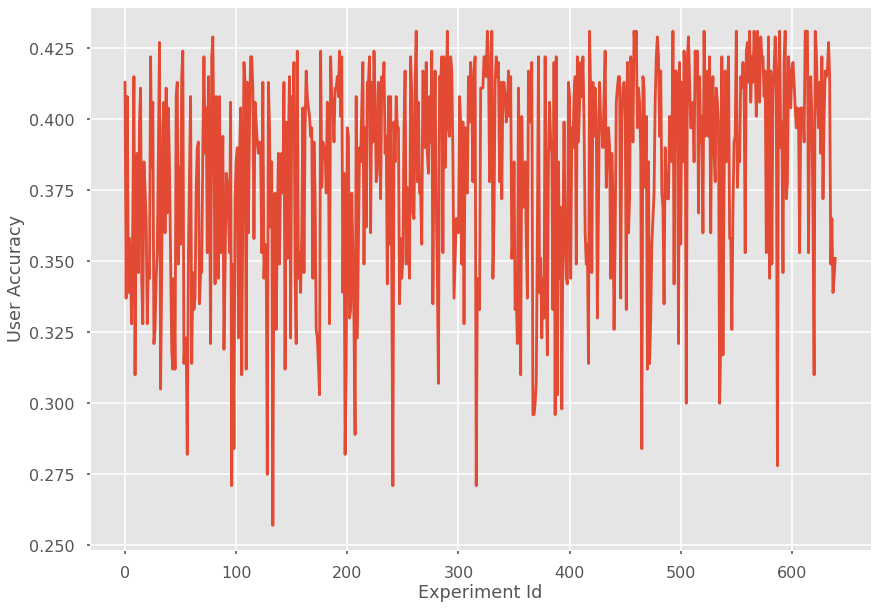

In [11]:
plt.figure(figsize = (14, 10))
plt.plot(data['id'].values, data['user_accuracy'].values)
plt.xlabel("Experiment Id")
plt.ylabel("User Accuracy")
plt.show()

In [12]:
data.groupby("model")["user_accuracy"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
<class 'lightgbm.sklearn.LGBMClassifier'>,130.0,0.352031,0.016609,0.314,0.33975,0.353,0.36200,0.399
<class 'sklearn.ensemble._forest.RandomForestClassifier'>,182.0,0.404418,0.017760,0.349,0.39050,0.408,0.41925,0.431
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>,24.0,0.314292,0.033215,0.257,0.28775,0.313,0.32925,0.385
<class 'sklearn.linear_model._logistic.LogisticRegression'>,178.0,0.394972,0.024451,0.319,0.38500,0.401,0.41300,0.431
<class 'sklearn.svm._classes.SVC'>,126.0,0.375159,0.047129,0.271,0.33525,0.397,0.41650,0.431


In [13]:
data.groupby("columns")["user_accuracy"].describe()

,count,mean,std,min,25%,50%,75%,max
columns,,,,,,,,
"['social_prepocessed_text', 'happy', 'angry', 'surprise', 'sad', 'fear']",162.0,0.366173,0.037616,0.257,0.344,0.374,0.3935,0.424
['social_prepocessed_text'],121.0,0.388413,0.032098,0.271,0.365,0.399,0.4130,0.422
"['text', 'happy', 'angry', 'surprise', 'sad', 'fear']",108.0,0.373778,0.038730,0.282,0.346,0.382,0.4080,0.429
['text'],249.0,0.392771,0.032499,0.282,0.372,0.406,0.4170,0.431


In [14]:
display(data.sort_values(by = "user_accuracy", ascending = False).head(n = 10))

,id,model,parameters,columns,transformers,column_transforms,valid_strategy,one_fold,observation,post_accuracy,post_precision,post_recall,post_error,user_accuracy,user_precision,user_recall,user_error
458,458,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 10.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.674,0.545,0.161,0.431,0.674,0.545,0.161
621,621,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 200, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.657,0.556,0.138,0.431,0.657,0.556,0.138
550,550,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.648,0.563,0.128,0.431,0.648,0.563,0.128
594,594,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.648,0.563,0.128,0.431,0.648,0.563,0.128
418,418,<class 'sklearn.ensemble._forest.RandomForestC...,"{'n_estimators': 450, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.648,0.563,0.128,0.431,0.648,0.563,0.128
460,460,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 10.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.674,0.545,0.161,0.431,0.674,0.545,0.161
493,493,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 7.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.667,0.550,0.151,0.431,0.667,0.550,0.151
612,612,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 10.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.674,0.545,0.161,0.431,0.674,0.545,0.161
613,613,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 7.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.667,0.550,0.151,0.431,0.667,0.550,0.151
614,614,<class 'sklearn.linear_model._logistic.Logisti...,"{'C': 7.0, 'random_state': 42}",['text'],"[{'name': 'word_tfidf', 'algorithm': <class 's...","{'remainder': StandardScaler(copy=True, with_m...",1,False,BayesianOptimizationOOF,0.431,0.667,0.550,0.151,0.431,0.667,0.550,0.151


In [15]:
display(data.iloc[31].values)

array([31, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
       "{'n_estimators': 500, 'random_state': 42}",
       "['text', 'happy', 'angry', 'surprise', 'sad', 'fear']",
       '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 7), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
       "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
       1, False, 'BayesianOptimizationOOF', 0.4270000000000001, 0.637,
       0.564, 0.131, 0.4270000000000001, 0.637, 0.564, 0.131],
      dtype=object)

In [16]:
display(data.iloc[176].values)

array([176, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
       "{'n_estimators': 350, 'random_state': 42}",
       "['social_prepocessed_text', 'happy', 'angry', 'surprise', 'sad', 'fear']",
       '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 3), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'social_prepocessed_text\'}]',
       "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
       1, False, 'BayesianOptimizationOOF', 0.424, 0.649, 0.551,
       0.14400000000000002, 0.424, 0.649, 0.551, 0.14400000000000002],
      dtype=object)

In [17]:
display(data.iloc[290].values)

array([290, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
       "{'n_estimators': 200, 'random_state': 42}", "['text']",
       '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 2), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
       "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
       1, False, 'BayesianOptimizationOOF', 0.431, 0.657, 0.556, 0.138,
       0.431, 0.657, 0.556, 0.138], dtype=object)

In [18]:
for idx, group in data.groupby("model"):
    print(f"Models: {idx}")
    display(group.sort_values(by = ["user_accuracy", "id"], ascending = (False, False)).head(n = 1).values)

Models: <class 'lightgbm.sklearn.LGBMClassifier'>


array([[13, "<class 'lightgbm.sklearn.LGBMClassifier'>",
        "{'n_estimators': 350, 'random_state': 42}",
        "['social_prepocessed_text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 7), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'social_prepocessed_text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.39899999999999997, 0.617,
        0.53, 0.161, 0.39899999999999997, 0.617, 0.53, 0.161]],
      dtype=object)

Models: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


array([[621, "<class 'sklearn.ensemble._forest.RandomForestClassifier'>",
        "{'n_estimators': 200, 'random_state': 42}", "['text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 2), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.431, 0.657, 0.556, 0.138,
        0.431, 0.657, 0.556, 0.138]], dtype=object)

Models: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


array([[100,
        "<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>",
        "{'n_estimators': 25, 'random_state': 42}", "['text']",
        "[{'name': 'word_tfidf', 'algorithm': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'parameters': {'analyzer': 'word', 'ngram_range': (1, 1)}, 'columns': 'text'}]",
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.385, 0.629, 0.499, 0.147,
        0.385, 0.629, 0.499, 0.147]], dtype=object)

Models: <class 'sklearn.linear_model._logistic.LogisticRegression'>


array([[614,
        "<class 'sklearn.linear_model._logistic.LogisticRegression'>",
        "{'C': 7.0, 'random_state': 42}", "['text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 3), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.431, 0.667, 0.55, 0.151,
        0.431, 0.667, 0.55, 0.151]], dtype=object)

Models: <class 'sklearn.svm._classes.SVC'>


array([[589, "<class 'sklearn.svm._classes.SVC'>",
        "{'C': 10.0, 'random_state': 42}", "['text']",
        '[{\'name\': \'word_tfidf\', \'algorithm\': <class \'sklearn.feature_extraction.text.TfidfVectorizer\'>, \'parameters\': {\'analyzer\': \'word\', \'ngram_range\': (1, 3), \'token_pattern\': \'(?u)\\\\b\\\\w\\\\w+\\\\b|!|,|.|\\\\?|\\\\"|\\\\\\\'\'}, \'columns\': \'text\'}]',
        "{'remainder': StandardScaler(copy=True, with_mean=True, with_std=True), 'n_jobs': -1}",
        1, False, 'BayesianOptimizationOOF', 0.431, 0.667, 0.55, 0.156,
        0.431, 0.667, 0.55, 0.156]], dtype=object)